
# Investigating a Dataset
### Analysis of No Show Appointments in Brazil

Renee Cothern - May 13th, 2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul>
        <li><a href="#intro_research">Research Questions</a></li>
        <li><a href="#intro_data">Data and Libraries</a></li>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#wrangling_import">Data Import and Inspection</a></li>
        <li><a href="#wrangling_plan">Data Cleanse Plan and Observations</a></li>
        <li><a href="#wrangling_cleaning">Cleaning the Data</a></li>   
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">Exploratory Question 1</a></li>
        <li><a href="#q2">Exploratory Question 2</a></li>
        <li><a href="#q3">Exploratory Question 3</a></li>
        <li><a href="#q4">Exploratory Question 4</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
___

> **Dataset**: This dataset is a collection of information from medical appointments in Brazil with the focus of trying to predict whether or not patients will show up for their appointment.  

**Original data location:  https://www.kaggle.com/joniarroba/noshowappointments**


<a id='intro_research'></a>

### Research Questions
1.  What percentage of the sample taken didn't show up for the appointment?
2.  Is the problem monetary related?  Were patients more prone to show up when they had scholarships?
3.  Is the problem related to physical restrictions such as with age or health? 
4.  Did sending an SMS message appear to assist patients to show up for an appointment?


<a id='intro_data'></a>

### Data and Libraries

In [1]:
# Setup data libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Show plots in notebook
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling
___

> **Info**: Load the data, check for cleanliness, trim and clean the dataset, and change any datasets for optimal analysis. 


<a id='wrangling_import'></a>
### Data Import and Inspection



In [2]:
#read data and display data information
appts_df = pd.read_csv("noshowappointments.csv")
appts_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The above shows that there are 110,527 entries of data, and 14 columns of data

> **Data Dictionary**: 
1.  PatientId: Patient Identification (can contain multiple entries)
2.  AppointmentID: Appointment ID (unique for every appointment)
3.  Gender - M/F
4.  ScheduledDay - The date the appointment was scheduled
5.  AppointmentDay - The actual appointment day
6.  Age - Age of patient
7.  Neighbourhood (later removed) - The place the appointment was held at
8.  Scholarship - Whether or not the patient was enrolled in Brazilian welfare program
9.  Hipertension (changed to **Hypertension** below) - Did the patient have hypertension (high blood pressure)?
10. Alcoholism - Did the patient have a problem with alcoholism?
11. Handcap - (changed to **Handicap** below) Was the patient restricted by a handicap?
12. SMS_received - Did the patient receive a text reminder?
13. No-show - (changed to **NoShow** below) Did the patient show up?


In [3]:
#Observation of first five rows of data
appts_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling_plan'></a>
### Data cleanse plan and observations
All variables are independent except "no_show" which is the dependent variable we are measuring

Plan is as follows:
1.  Change column names
2.  Remove unneeded columns - I will be removing Neighborhood because for this study it's unneeded and it will allow for cleaner, smaller dataset
3.  Change PatientID to an integer as the import made it a float.  
4.  Change appointment and scheduled dates to a date field
5.  Currently the "question" fields are as follows:  Scholarship, Hypertension, Alcoholism, Handicap, and SMS_received are all 1's (True) and 0's (False).  Will actually change it for readability to True/False.
6.  Change NoShow column, so that No is True, and Yes is False for clarity and better manipulation of data.
7.  Check Age data for appropriate values, then change to an integer





<a id='wrangling_cleaning'></a>
### Cleaning the Data


#### Data cleanse - Plan 1:
*Change the column names to remove typos*


In [4]:
#Rename Columns and check to make sure they changed
appts_df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap', 'No-show':'NoShow'}, inplace = True)
appts_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow'],
      dtype='object')

#### Data cleanse - Plan 2:
*Remove unneeded columns*

In [5]:
#Remove the "Neighbourhood" column and make sure it's gone
del appts_df['Neighbourhood']
appts_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'NoShow'],
      dtype='object')

#### Data cleanse - Plan 3:
*Change patient ID to an integer*

In [6]:
#Determine missing values in all data before making datatype changes
#This is accomplished by summing any "null" values
appts_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
NoShow            0
dtype: int64

In [7]:
#Now that we are assured there is no missing data, we can change the PatientId type to an integer
#Make sure data looks okay
appts_df.PatientId = appts_df.PatientId.astype(int)
appts_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


#### Data cleanse - Plan 4:
*Change appointment and scheduled dates to a date field*


In [8]:
#The time is irrelevant at this point, so I'm only going to parse the date
#I don't really need these fields for the data I'm analyzing
#But I might need them for sorting or data visualizing
from datetime import datetime as dt

def change_date(date):
    if date == '':
        return None
    else:
        datePart = date[0:10]
        return dt.strptime(datePart, '%Y-%m-%d')
    
appts_df['ScheduledDay'] = appts_df['ScheduledDay'].apply(change_date)
appts_df['AppointmentDay'] = appts_df['AppointmentDay'].apply(change_date)

In [9]:
#Check the new dates
appts_df.info()
print(appts_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Scholarship     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handicap        110527 non-null  int64         
 11  SMS_received    110527 non-null  int64         
 12  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB
         PatientId  Appo

#### Data cleanse - Plan 5:
*Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received to a Boolean field*



In [10]:
#Change the 1/0s to a Boolean field, which technically IS a 1 and 0 anyway, but it looks nicer and
#Makes code read nicer to test for True / False
appts_df['Scholarship'] = appts_df['Scholarship'].astype(bool)
appts_df['Hypertension'] = appts_df['Hypertension'].astype(bool)
appts_df['Diabetes'] = appts_df['Diabetes'].astype(bool)
appts_df['Alcoholism'] = appts_df['Alcoholism'].astype(bool)
appts_df['Handicap'] = appts_df['Handicap'].astype(bool)
appts_df['SMS_received'] = appts_df['SMS_received'].astype(bool)

In [11]:
#Check it
appts_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,False,True,False,False,False,False,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,False,False,False,False,False,False,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,False,False,False,False,False,False,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,False,False,False,False,False,False,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,False,True,True,False,False,False,No


#### Data cleanse - Plan 6:
*Change NoShow from object 'No', or 'Yes' to boolean True/False*


In [12]:
#check NoShow for any answers that are other than No or Yes
appts_df['NoShow'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
#Change field to integer first - 1,0, and then change to Boolean
def change_noshow(answer):
    if answer == 'Yes':
        newanswer = '1'
    else: 
        newanswer = '0'
    return newanswer

appts_df['NoShow'] = appts_df['NoShow'].apply(change_noshow).astype(int)

In [14]:
#spot check
print(appts_df.iloc[25:35,12])

#now change to boolean
appts_df['NoShow'] = appts_df['NoShow'].astype(bool)

#spot check again
print(appts_df.iloc[25:35,12])


25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
Name: NoShow, dtype: int64
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
Name: NoShow, dtype: bool


#### Data cleanse - Plan 7:
*Check Age data for appropriate values, then change to an integer*

In [15]:
#First convert to an integer field and check
appts_df['Age'] = appts_df['Age'].astype(int)
appts_df['Age'].dtype

dtype('int64')

In [16]:
#Now check for any strange values
appts_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Data looks okay, but I noticed there is a -1 and a 0.  I can't assume that 0 is wrong, because that might apply to a child who is under the age of 1. However, I can assume that -1 is wrong.  It could be a prenatal appointment, 
but I think 0 would still be appropriate here and more clear.  I will replace the -1 with 0.

In [17]:
#use Pandas replace function to take away any -1s and replace them with 0s
appts_df['Age'].replace(-1, 0, inplace=True)

In [18]:
#check again, and -1 is now gone
appts_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

<a id='eda'></a>
## Exploratory Data Analysis
___

> **About this section**: This section will compute statistics and create visualizations with the goal of addressing the research questions posed below. First question we'll address is about the problem itself, and then we'll look at the defails of the data.

<a id='q1'></a>
### Question 1:  What percentage of the sample taken didn't show up for the appointment?

#### Information about the sample timeframe:

In [19]:
#variables to work with to make data manipulation clearer
shows = appts_df['NoShow'] == False
noshows = appts_df['NoShow'] == True

In [20]:
#Determine sample dates
LatestDate = appts_df.AppointmentDay.max()
EarliestDate = appts_df.AppointmentDay.min()

#Get only the Date, not the timestamp
LatestDateStr = str(LatestDate)
EarliestDateStr = str(EarliestDate)
LastDayofSample = LatestDateStr[0:10]
FirstDayofSample = EarliestDateStr[0:10]
print("First Sample Date:", FirstDayofSample)
print("Last Sample Date:", LastDayofSample)

#Get total sample days
TimeFrame = str(LatestDate - EarliestDate)
TotalDaysofSample = TimeFrame[0:7]
print("Total number of days sampled: ", TotalDaysofSample)

First Sample Date: 2016-04-29
Last Sample Date: 2016-06-08
Total number of days sampled:  40 days


#### Sample information about the problem:  shows vs. noshows:

In [21]:
#Calculate data counts
AllShowCount = appts_df['NoShow'].count()
print("Total number of people sampled: ", AllShowCount)
Shows = appts_df.NoShow[shows].count()
print("Total number of people who showed: ", Shows)
NoShows = appts_df.NoShow[noshows].count()
print("Total number of people who didn't show: ", NoShows)

#Calculate percentages
NoShowPercent = (NoShows / AllShowCount) * 100
ShowPercent = (Shows / AllShowCount) * 100
print('Percentage of patients who show to their appointments is %.2f%%' % ShowPercent)
print('Percentage of patients who do not show to their appointments is %.2f%%' % NoShowPercent)

Total number of people sampled:  110527
Total number of people who showed:  88208
Total number of people who didn't show:  22319
Percentage of patients who show to their appointments is 79.81%
Percentage of patients who do not show to their appointments is 20.19%


**Pie graph to visualize the problem better:** As you can see from the below graph and the above statistics, that nearly 20% of patients do not show up to their appointments.  While many factors could exist as to why, and we can never determine causation, we can look at the data provided and see if there are any correlations as to why that problem could possibly exist.

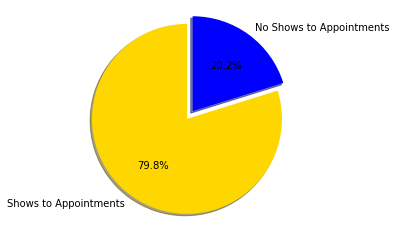

In [22]:
#Pie code 
labels = 'Shows to Appointments', 'No Shows to Appointments'
sizes = [ShowPercent, NoShowPercent]
explode = (0, 0.1)  

fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = ['gold', 'blue'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#pie code

<a id='q2'></a>
### Question 2:  Is the problem monetary related?  Were patients more prone to show up when they had scholarships?

The scholarship indicates whether or not the patient was enrolled in Brazilian welfare program

In [23]:
#Variables to work with to make some of the data manipulation clearer
scholarshipYes = appts_df['Scholarship'] == True
scholarshipNo = appts_df['Scholarship'] == False


#### General information about scholarships - those who received scholarships vs. those who did not, and then comparing that to the shows vs. no shows.

In [24]:
#Count of number of people who recieved a scholarship
ScholarshipYesCount = appts_df.Scholarship[scholarshipYes].count()
print("Those who did receive a scholarship:", ScholarshipYesCount)

ScholarshipNoCount = appts_df.Scholarship[scholarshipNo].count()
print("Those who did not receive a scholarship:", ScholarshipNoCount)

print()


Those who did receive a scholarship: 10861
Those who did not receive a scholarship: 99666



In [36]:
print(appts_df.groupby('Scholarship').mean().loc[:,'NoShow'])



Scholarship
False    0.198072
True     0.237363
Name: NoShow, dtype: float64


The people without a scholarship no-show rate is 20% versus the people with a scholarship is 24%.

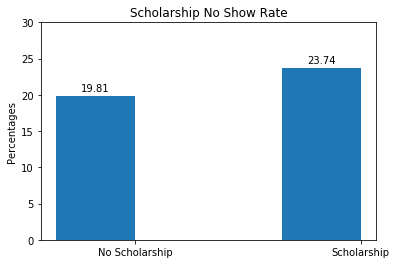

In [37]:
#Make clean percentages for bar graph

appts_df.groupby('Scholarship').mean().loc[0,'NoShow']
appts_df.groupby('Scholarship').mean().loc[1,'NoShow']
NoScholarshipNoShowMean=appts_df.groupby('Scholarship').mean().loc[0,'NoShow']
ScholarshipNoShowMean=appts_df.groupby('Scholarship').mean().loc[1,'NoShow']
NoScholarshipNoShowPercent=round(NoScholarshipNoShowMean*100,2)
ScholarshipNoShowPercent=round(ScholarshipNoShowMean*100,2)

#Bar Graph with my clean percentages
labels = ['No Scholarship', 'Scholarship']
scholarship = [NoScholarshipNoShowPercent, ScholarshipNoShowPercent]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scholarship, width, label='Scholarship')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Scholarship No Show Rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(top=30)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

**My Conclusion:** That the scholarship did not assist in motivating people to make their appointment.

<a id='q3'></a>
### Question 3:  Is the problem related to physical restrictions such as with age or health?  

#### Looking at the below, the median age is 37 which is pretty young.  In addition to that the histogram below gives a visualization that those who did not show to the appointment, labeled in orange, actually goes down as the age increases.  This shows that there is no correlation between older age and not showing to an appointment.

Median age of sample population: 37 years old

Blue = Shows, Orange = NoShows


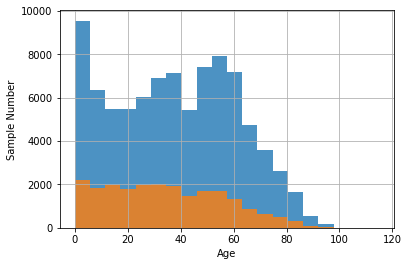

In [27]:
print("Median age of sample population:", int(appts_df.Age.median()), "years old")
print()

print("Blue = Shows, Orange = NoShows")
appts_df.Age[shows].hist(alpha=0.8, bins=20);
plt.xlabel("Age")
plt.ylabel("Sample Number")
appts_df.Age[noshows].hist(alpha=0.8, bins=20);


**Looking at age further, it also appears that people between the ages of 10 and 40 have no higher rate**

In [32]:
appts_df.loc[:, 'Age_Grp'] = pd.cut(appts_df['Age'], bins=[0,10,40,90], labels=['Children', 'Adults', 'Seniors'])
appts_df.groupby('Age_Grp').mean().loc[:, 'NoShow']

Age_Grp
Children    0.207035
Adults      0.236896
Seniors     0.172302
Name: NoShow, dtype: float64

#### To investigate to see if there is a correlation between health conditions and shows vs. no shows, I used a Pearson's r correlation chart.  The correlation chart is shown in the way of a "heatmap".  If a correlation exists between two data items, the number has to be closer to 1 with a color indicator of "warm type colors", red being the maximum correlation.  No correlation is indicated by the result being closer to 0, or by being a "cold color", blue being the least correlation.

#### You would then meet in the middle.  For example, if I were to look Age on the left and Hypertension on the bottom and meet in the middle it'll show a "peach colored" square.  That indicates there could be a correlation between age and hypertension (high blood pressure) because it's a warmer color.  

***Note:  For columns matched to themselves will always be 1 (red).  See the example correlation from Age to Hypertension below!***

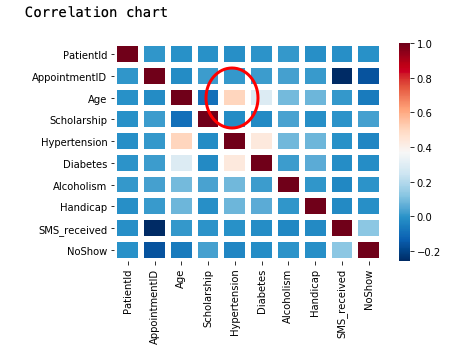

**My observation:** There doesn't appear to be any correlation with any of the health fields and the No Show column.

Correlation chart


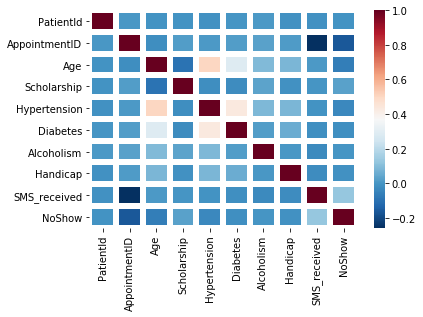

In [33]:
#Pearson's r correlation chart
print('Correlation chart')
pearsoncorr = appts_df.corr(method='pearson',min_periods=1)

sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=5);

<a id='q4'></a>
### Question 4:  Did sending an SMS message appear to assist showing up for an appointment?

#### It appears there was a very marginal difference between those who received an SMS reminder and showed up vs. those who did not receive an SMS reminder and did not show up to the appointment.  Therefore, there is no way to tell the text reminder helps.


In [34]:
#SMS Yes and Shows count
SMSAndShows = len(appts_df[(appts_df.SMS_received == True) & (appts_df.NoShow == False)])
print("Those who received a text reminder and did show up to the appointment:", SMSAndShows)

#SMS No and Shows count
SMSNoAndShows = len(appts_df[(appts_df.SMS_received == False) & (appts_df.NoShow == False)])
print("Those who did NOT receive a text reminder and did show up to the appointment:", SMSNoAndShows)

#SMS No and No Shows count
SMSNoAndNoShows = len(appts_df[(appts_df.SMS_received == False) & (appts_df.NoShow == True)])
print("Those who did NOT receive a text reminder and did NOT show up to the appointment:", SMSNoAndNoShows)

Those who received a text reminder and did show up to the appointment: 25698
Those who did NOT receive a text reminder and did show up to the appointment: 62510
Those who did NOT receive a text reminder and did NOT show up to the appointment: 12535


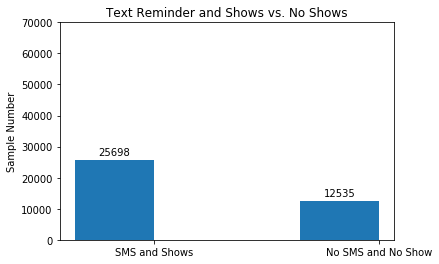

In [35]:
#bar chart 
labels = ['SMS and Shows', 'No SMS and No Show']
sms = [SMSAndShows, SMSNoAndNoShows]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sms, width, label='SMS')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Number')
ax.set_title('Text Reminder and Shows vs. No Shows')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(top = 70000)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

plt.show()

**In the earlier correlation chart** you will notice the NoShow column correlating with the SMS_received column showed a light blue correlation.  This is about a .3 correlation which shows a very low chance that those receiving a text message influences the patients showing or not showing to an appointment based on this dataset. 


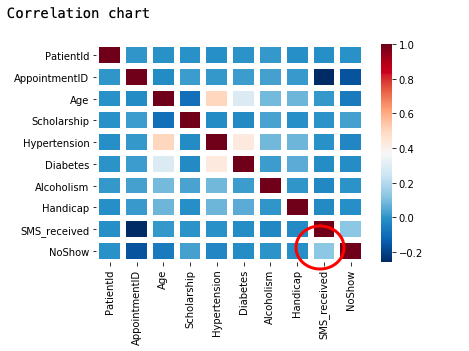


<a id='conclusions'></a>
## Conclusions

During this analysis, the dependent variable NoShow (those who showed for an appointment vs. those who didn't show) was compared to the independent variables received in the dataset.  I will break down my findings below in accordance to the questions asked.  There wasn't compelling evidence to suggest why there were patients not showing to appointments based on the data collected.  Further data or more advanced analysis could reveal some new correlations to help predict how to help patients show up to appointments in Brazil.

**Question- Is the problem monetary related?**  The goal was to analyze that if a patient enrolled in the Brazilian welfare program (scholarship), it removed monetary roadblocks that was preventing patients from getting to their appointments.
+ The people without a scholarship no-show rate is 20% versus the people with a scholarship is 24%. This shows only a 4% variation.
+ There is no indicator or correlation that shows that those who recieved a scholarship showed up to their appointment.

**Question - Is the problem related to physical restrictions such as with age or health?**  Was there a correlation with physical limitations, such as older age, or health?
+ In regards to age, the median age of this sample set is 37 which is pretty young.  Also those who did not show to the appointment actually goes down as the age increases - which shows the elderly are more apt to go to their appointments.  This shows that there is no correlation between older age and not showing to an appointment.
+ Those who are younger also show no higher rates.
+ For the health situations, a Pearson's r correlation test was performed, which also indicated no correlation with health limitations and not showing to appointments on time.

**Question - Did sending an text message appear to assist showing up for an appointment?**  
+ It appears there was a very marginal difference between those who received an SMS reminder and showed up vs. those who did not receive an SMS reminder and did not show up to the appointment.  The correlation is low, and the difference is minor.  So, there is no way to know if the text reminder helped.

**Summary thoughts:** A discussion about the limitations of the methods were used. 

+ **The sample timing:**  I noticed that the test was a sample of approximately 110,000 from April - June.  For Brazil, this is typically one of the colder times of year in Brazil, late April to early June.  Would the sample results change if it was taken in a warmer time of year?  Would there be more people show up as a result of warmer weather?  Does weather have an effect on travel conditions?

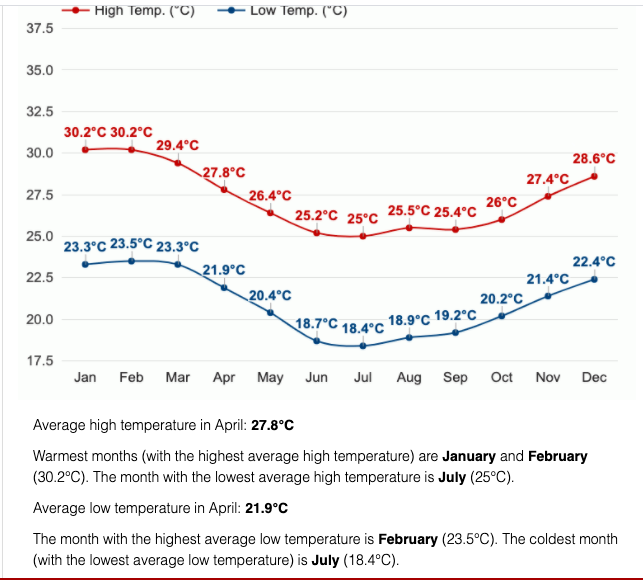

+ **The sample size:** While the sample size, being approximately 110,000 is a good size for a 209,000,000 million population, having more samples at different times of year would result in  more accurate mean values, and could identify outliers that could skew the data in a smaller sample and provide a smaller margin of error. (see below image)

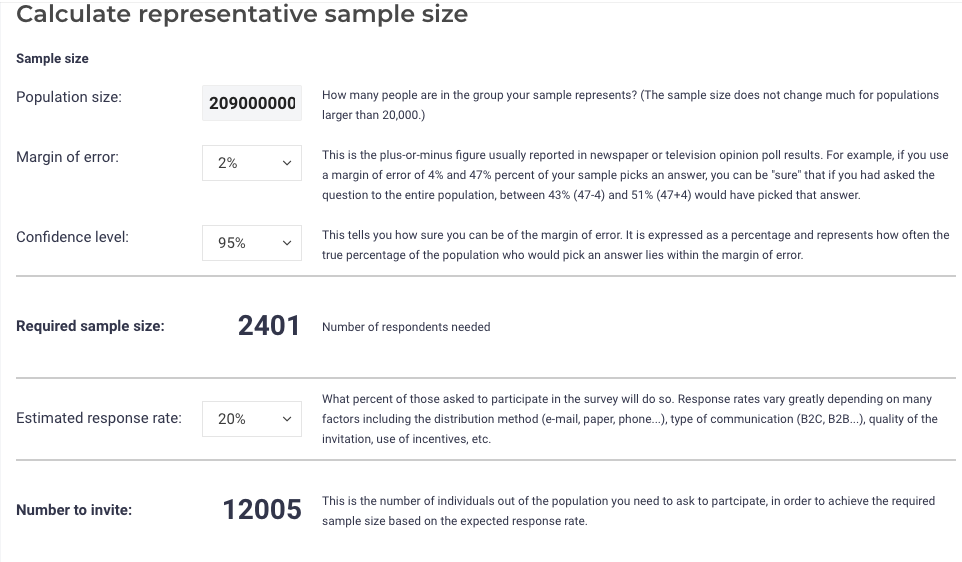

+ **The quality of the sample:** It appears that much of the data was taken from patient/medical facility databases.  It appears it may be useful to have a survey that includes more questions such as:  Did the text message help you remember your appointment?  What was the reason you didn't make the appointment?  How far do you have to travel to your appointment?  These are important points in determining why there is such a high "no show" rate. It would be important to formulate the sample to get at least a 20% response rate, maybe it's a survey that could be at visit.  It also might be useful to collect more information in the patient database, such as, is the patient ambulatory (can move without a wheel chair)?  What is the average household income?  Does the patient have a history of substance abuse? How far does the patient have to travel to his/her appointment.

+ **Analysis limitations:**  Much of the data sampling was true/false.  This provides a vagueness of data and can trick the casual observer into believing something other than what the data shows.  It would be useful to actually have some statistical numbers to deal with an association to cause.  For example, IF, comparitively, we saw a high "true" value with health related issues, and a high no show rate - one could draw an assumption that health related issues were the cause of not showing up.  However correlation does not imply causation.  A more accurate look at the analysis would, using sampling, to ask the question "Did you not show up to your appointment due to a health-related limitation?"  Those numbers would result in more accurate and specific analysis, and better predictions or conclusions could be drawn.
